[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Huynh-Tr/stockVN/blob/main/VnStock.ipynb)

# **Prequisites**

In [1]:
!nvidia-smi # to check using NVIDIA card

Mon Nov 20 02:21:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install cudf-cu11 --extra-index-url=https://pypi.nvidia.com # install cudf
!pip install vnstock # install vnstock

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.4/582.4 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 104.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found 

In [3]:
import cudf

import vnstock as vns
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
# restart kernel if needed
# get_ipython().kernel.do_shutdown(restart=True)

%load_ext cudf.pandas

# **Market**

In [20]:
%%time

# company list (offline source)
companies_list = vns.listing_companies()
companies_list_HNX_HOSE = companies_list.loc[:, 'ticker':'subgroup'][companies_list.comGroupCode != 'UPCOM']
companies_list_UPCOM = companies_list.loc[:, 'ticker':'subgroup'][companies_list.comGroupCode == 'UPCOM']

print(f'Numbers of Companies : \n{companies_list.comGroupCode.value_counts()}')
print('--------------------------------------------------')
print(f'{companies_list.shape[1]} Column Names : \n{companies_list.columns}')
print('--------------------------------------------------')
print(f'Numbers of Companies in each industry on HOSE&HNX: \n{companies_list_HNX_HOSE.industry.value_counts()}')
print('--------------------------------------------------')
# print(f'Numbers of Companies in each group on HOSE&HNX: \n{companies_list_HNX_HOSE.group.value_counts()}')
# print('--------------------------------------------------')

Numbers of Companies : 
UPCOM    865
HOSE     411
HNX      331
Name: comGroupCode, dtype: int64
--------------------------------------------------
35 Column Names : 
Index(['ticker', 'comGroupCode', 'organName', 'organShortName',
       'organTypeCode', 'comTypeCode', 'icbName', 'icbNamePath', 'sector',
       'industry', 'group', 'subgroup', 'icbCode', 'VN30', 'VNMID', 'VN100',
       'VNSML', 'VNALL', 'HNX30', 'VNX50', 'VNXALL', 'VNDIAMOND', 'VNFINLEAD',
       'VNFINSELECT', 'VNSI', 'VNCOND', 'VNCONS', 'VNENE', 'VNFIN', 'VNHEAL',
       'VNIND', 'VNIT', 'VNMAT', 'VNREAL', 'VNUTI'],
      dtype='object')
--------------------------------------------------
Numbers of Companies in each industry on HOSE&HNX: 
Xây dựng và Vật liệu             136
Hàng & Dịch vụ Công nghiệp       102
Bất động sản                      77
Tài nguyên Cơ bản                 60
Thực phẩm và đồ uống              53
Điện, nước & xăng dầu khí đốt     53
Dịch vụ tài chính                 48
Hóa chất                

In [47]:
companies_list.head()

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,...,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,...,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False


## **Company overview**

In [67]:
%%time

# Extract data group
group = 'Ngân hàng'
tickers = (companies_list
           .ticker[companies_list.group == group]
           .tolist())
columns = ['ticker', 'noShareholders', 'foreignPercent', \
    'outstandingShare', 'issueShare', 'establishedYear', \
    'noEmployees', 'stockRating', 'deltaInWeek', 'deltaInMonth', \
    'deltaInYear', 'shortName']

com_overview = pd.DataFrame()
for ticker in tickers:
    com_overview = pd.concat([vns.company_overview(ticker), com_overview])
    com_overview = com_overview[columns]

print(f'group: {com_overview.shape[0]} {group}')
(com_overview
    .sort_values('stockRating', ascending=False)
    .set_index([pd.Series(range(com_overview.shape[0]))]))

group: 27 Ngân hàng
CPU times: user 2.73 s, sys: 42.6 ms, total: 2.77 s
Wall time: 20.7 s


,ticker,noShareholders,foreignPercent,outstandingShare,issueShare,establishedYear,noEmployees,stockRating,deltaInWeek,deltaInMonth,deltaInYear,shortName
0,HDB,6015,0.195,2892.6,2907.6,1992,16326,3.8,-0.018,0.098,0.337,HDBank
1,ACB,44011,0.300,3884.1,3884.1,None,13190,3.2,0.014,0.040,0.164,ACB
2,MBB,126621,0.232,5214.1,5214.1,1994,16085,3.2,0.012,0.035,0.253,MBBank
3,TCB,1901,0.225,3517.2,3517.2,1993,11742,3.1,0.004,0.015,0.242,Techcombank
4,VCB,25183,0.235,5589.1,5589.1,2008,22862,3.0,-0.004,0.029,0.178,Vietcombank
5,TPB,20231,0.299,2201.6,2201.6,2008,8588,3.0,0.000,0.047,0.091,TPBank
6,OCB,0,0.212,2054.8,1369.9,1996,6155,2.9,0.004,0.113,0.332,Ngân hàng Phương Đông
7,CTG,0,0.272,4805.8,4805.8,1988,24939,2.9,0.011,0.066,0.030,VietinBank
8,NAB,0,0.001,1058.0,1058.0,1992,4639,2.8,0.014,0.109,1.290,Ngân hàng Nam Á
9,STB,92620,0.242,1885.2,1885.2,1991,18439,2.8,-0.005,0.007,0.649,Sacombank


In [142]:
(vns.company_large_shareholders(symbol='ACB')['shareHolder'].astype('string')+ " " +"<"+ vns.company_large_shareholders(symbol='ACB')['shareOwnPercent'].astype('string')+">").to_frame()

,0
0,Vietnam Enterprise Investments Limited <0.0626>
1,Trần Hùng Huy <0.0343>
2,Đặng Thu Thủy <0.0119>
3,Đặng Thu Hà <0.0103>
4,Nguyễn Thúy Lan <0.0096>
5,Nguyễn Thùy Hương <0.009>
6,Trần Phú Mỹ <0.0083>
7,Nguyễn Đức Kiên <0.0046>
8,Đặng Phú Vinh <0.0037>
9,Khác <0.2284>


In [146]:
%%time

#top 10 stockholders
group = 'Ngân hàng'
tickers = (companies_list
           .ticker[companies_list.group == group]
           .tolist())
top_stockholder = pd.DataFrame()
for s in tickers:
  top_stockholder[s] = (vns.company_large_shareholders(symbol=s)['shareHolder'].astype('string')+ " " +"<"+ vns.company_large_shareholders(symbol=s)['shareOwnPercent'].astype('string')+">").to_frame()
  top_stockholder = pd.concat([top_stockholder, pd.DataFrame()], axis=1)
top_stockholder

CPU times: user 5.13 s, sys: 92.4 ms, total: 5.22 s
Wall time: 41.9 s


,ACB,BID,CTG,HDB,MBB,SSB,SHB,STB,TCB,TPB,VCB,VIB,VPB,ABB,EIB,BVB,KLB,LPB,MSB,NAB,BAB,NVB,OCB,PGB,SGB,VAB,VBB
0,Vietnam Enterprise Investments Limited <0.0626>,The State Bank Of Vietnam <0.8099>,The State Bank Of Vietnam <0.6446>,Công ty Cổ phần Tập đoàn Sovico <0.1448>,Tập đoàn Công nghiệp - Viễn thông Quân đội <0....,Công ty TNHH MTV Đầu tư Phú Mỹ <0.0522>,Công ty Cổ phần Tập đoàn T&T <0.1>,Trầm Trọng Ngân <0.0473>,Công ty Cổ phần Tập đoàn Masan <0.1491>,Công ty Cổ phần FPT <0.0677>,The State Bank Of Vietnam <0.748>,Commonwealth Bank of Australia (CBA) <0.2>,Composite Capital Master Fund LP. <0.05>,Ngân hàng Maybank <0.1639>,Lương Thị Cẩm Tú <0.0112>,Nguyễn Thanh Phượng <0.0456>,Đỗ Anh Tuấn <0.0492>,Tổng Công ty Bưu Điện Việt Nam <0.0654>,Tập Đoàn Bưu Chính Viễn Thông Việt Nam (loại H...,Công ty TNHH Rồng Thái Bình Dương <0.1206>,Thái Hương <0.0406>,Trần Hải Anh <0.0493>,Aozora Bank Limited <0.15>,Công ty Cổ Phần Quốc Tế Cường Phát <0.1354>,Văn phòng Thành ủy TP HCM <0.1818>,CÔNG TY CỔ PHẦN TẬP ĐOÀN ĐẦU TƯ VIỆT PHƯƠNG ...,Dương Ngọc Hòa <0.0455>
1,Trần Hùng Huy <0.0343>,"KEB Hana Bank, Co., Ltd. <0.15>",Ngân hàng Tokyo Mitsubishi UFJ <0.1973>,PHẠM VĂN ĐẨU <0.0431>,Tổng Công ty Đầu Tư Và Kinh Doanh Vốn Nhà Nước...,Nguyễn Thị Nga <0.0354>,Đỗ Vinh Quang <0.0296>,Dương Công Minh <0.0332>,Nguyễn Thị Thanh Thủy <0.0495>,Công ty Cổ Phần Tập Đoàn Vàng Bạc Đá Quý Doji ...,Mizuho Bank Limited <0.15>,Đỗ Xuân Hoàng <0.0496>,NGÔ CHÍ DŨNG <0.0487>,Tập Đoàn Geleximco - Công ty Cp <0.1278>,Phạm Hữu Phú <0.002>,NGÔ QUANG TRUNG <0.0313>,Đỗ Anh Tuấn <0.0492>,Nguyễn Đình Thắng <0.0429>,Trần Anh Tuấn <0.008>,Nguyễn Quốc Toàn <0.0426>,Nguyễn Trọng Trung <0.0334>,Nguyễn Trần Trung Sơn <0.0302>,Trịnh Văn Tuấn <0.0443>,Công ty Cổ Phần Thương Mại Vũ Anh Đức <0.1336>,Công Ty TNHH Một Thành Viên Xây Dựng Và Kinh D...,Phương Hữu Việt <0.0455>,Dương Nhất Nguyên <0.0336>
2,Đặng Thu Thủy <0.0119>,Khác <0.0033>,Khác <0.0853>,NGUYỄN THỊ PHƯƠNG THẢO <0.037>,Tổng Công ty Trực thăng Việt Nam <0.0819>,Lê Hữu Báu <0.0349>,Đỗ Quang Hiển <0.0275>,Trầm Khải Hòa <0.0177>,Nguyễn Thị Thanh Tâm <0.0495>,Đỗ Anh Tú <0.0371>,Khác <0.0295>,Đặng Khắc Vỹ <0.0495>,Hoàng Anh Minh <0.0485>,International Finance Corporation <0.082>,Nguyễn Văn Trữ <0.0004>,Lê Anh Tài <0.0286>,VŨ XUÂN DƯƠNG <0.0489>,Nguyễn Đức Thụy <0.0285>,Lại Thanh Mai <0.0004>,Nguyễn Thị Thanh Vân <0.0426>,Trần Thị Thoảng <0.0318>,Nguyễn Thị Hoa <0.0228>,TRỊNH MAI LINH <0.0427>,Công ty TNHH Xuất Nhập Khẩu Và Phát Triển Thươ...,Công ty TNHH Kỳ Hòa <0.1635>,Phương Thanh Nhung <0.0341>,Đặng Đình Thắng <0.0275>
3,Đặng Thu Hà <0.0103>,<NA>,<NA>,Lưu Văn Sơn <0.0301>,Công Ty Tnhh Một Thành Viên Tổng Công Ty Tân C...,LÊ THU THỦY <0.0236>,Đỗ Thị Thu Hà <0.0206>,Trầm Bê <0.0147>,Hồ Anh Minh <0.0392>,Lê Quang Tiến <0.0361>,<NA>,Trần Thị Thảo Hiền <0.0494>,Vũ Thị Quyên <0.0483>,VŨ VĂN HẬU <0.0196>,Nguyễn Hữu Thọ <0.0003>,Nguyễn Hoài Nam <0.0172>,Phạm Trần Duy Huyền <0.0473>,Nguyễn Đức Thuỵ <0.0241>,Lê Thị Liên <0.0003>,Nguyễn Chấn <0.0411>,Nguyễn Văn Danh <0.0276>,Nguyễn Tiến Dũng <0.0159>,Trịnh Mai Vân <0.0375>,Lê Minh Quốc <0.0466>,Công Ty TNHH Một Thành Viên Dầu Khí Thành Phố ...,Trần Tiến Dũng <0.0101>,Dương Mai Anh <0.0211>
4,Nguyễn Thúy Lan <0.0096>,<NA>,<NA>,Nguyễn Hữu Đặng <0.0276>,Lê Văn Bé <0.0011>,Lê Tuấn Anh <0.022>,Đỗ Thị Minh Nguyệt <0.0071>,Trầm Thuyết Kiều <0.0144>,Hồ Thủy Anh <0.0298>,Đỗ Minh Quân <0.0334>,<NA>,Nguyễn Thị Nhất Thảo <0.049>,Kim Ngọc Cẩm Ly <0.0425>,Đào Mạnh Kháng <0.008>,Trương Văn Phước <0.0002>,Phạm Việt Hải <0.015>,Trần Thị Thu Hằng <0.0472>,Phạm Doãn Sơn <0.0185>,Nguyễn Hoàng Linh <0.0002>,Nguyễn Quốc Mỹ <0.0365>,Hoàng Ngọc Hòa <0.0236>,Lê Kim Chi <0.0112>,Cao Thị Quế Anh <0.0321>,Lê Minh Quốc <0.0466>,Nguyễn Cao Trí <0.0019>,Đỗ Công Chính <0.0012>,Dương Bảo Anh <0.017>
5,Nguyễn Thùy Hương <0.009>,<NA>,<NA>,Đào Duy Tường <0.0274>,Lưu Trung Thái <0.001>,Khúc Thị Quỳnh Lâm <0.0027>,NGUYỄN VĂN LÊ <0.0023>,Huỳnh Quế Hà <0.013>,Nguyễn Phương Hoa <0.0216>,Đỗ Quỳnh Anh <0.0307>,<NA>,Đặng Thị Thu

In [38]:
vns.company_officers(symbol='TCB', page_size=10, page=0)

,ticker,officerName,officerPosition,officerOwnPercent
0,TCB,Nguyễn Thị Thanh Thủy,None,0.0495
1,TCB,Nguyễn Thị Thanh Tâm,None,0.0495
2,TCB,Hồ Anh Minh,None,0.0392
3,TCB,Hồ Thủy Anh,None,0.0298
4,TCB,Nguyễn Phương Hoa,None,0.0216
5,TCB,Nguyễn Hương Liên,None,0.0198
6,TCB,HỒ HÙNG ANH,None,0.0112
7,TCB,Nguyễn Thiều Quang,Phó Chủ tịch Hội đồng Quản trị,0.0086
8,TCB,Nguyễn Cảnh Sơn Tùng,None,0.0060
9,TCB,Nguyễn Cảnh Sơn,Phó Chủ tịch Hội đồng Quản trị,0.0051


# **Company infomation**

### Tổng quan

In [44]:
vns.company_overview('TCB')

,ticker,exchange,industry,companyType,noShareholders,foreignPercent,outstandingShare,issueShare,establishedYear,noEmployees,stockRating,deltaInWeek,deltaInMonth,deltaInYear,shortName,industryEn,industryID,industryIDv2,website
0,TCB,HOSE,Ngân hàng,NH,1901,0.225,3517.2,3517.2,1993,11742,3.1,0.004,0.015,0.242,Techcombank,Banks,289,8355,https://techcombank.com


In [42]:
# profile
vns.company_profile('VCB')

,id,companyName,ticker,companyProfile,historyDev,companyPromise,businessRisk,keyDevelopments,businessStrategies
0,None,Ngân hàng Thương mại Cổ phần Ngoại thương Việt...,VCB,Ngân hàng Thương mại Cổ phần Ngoại thương Việ...,Ngày 30/10/1962: Ngân hàng Ngoại thương Việt...,None,Rủi ro địa chính trị và nguy cơ chiến tranh ...,Dịch vụ tài khoản Dịch vụ huy động vốn (tiền...,Đẩy mạnh tín dụng bán lẻ và huy động vốn giá...


In [19]:
# profile
vns.company_profile('VCB')

# giao dịch nội bộ
vns.company_insider_deals (symbol='TCB', page_size=20, page=0)

# cổ đông vốn lớn
vns.company_large_shareholders(symbol='VCB')

# các tỉ lệ cơ bản
vns.company_fundamental_ratio (symbol='VCB', mode='simplify', missing_pct=0.8)

# cong ty con, cong ty lien ket
vns.company_subsidiaries_listing (symbol='TCB', page_size=100, page=0)

# ban lanh dao
vns.company_officers (symbol='TCB', page_size=20, page=0)

# su kien
vns.company_events (symbol='TPB', page_size=15, page=0)

# chi tra co tuc
vns.dividend_history("VNM")

# chi so tai chinh
vns.financial_ratio("TCB", 'quarterly', True)

# bao cao tai chinh
# IS
vns.financial_flow(symbol="TCB", report_type='incomestatement', report_range='quarterly', get_all=False)
# BS
vns.financial_flow(symbol="TCB", report_type='balancesheet', report_range='quarterly', get_all=False)
# CF
vns.financial_flow(symbol="TCB", report_type='cashflow', report_range='quarterly', get_all=False)

# dinh gia
vns.stock_evaluation (symbol='TCB', period=1, time_window='D')

/usr/local/lib/python3.10/dist-packages/vnstock/fundamental.py:388: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = 'Q' + df['quarter'].astype(str)
/usr/local/lib/python3.10/dist-packages/vnstock/fundamental.py:390: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'] = df['quarter'].str.cat(df['year'].astype(str), sep='-')


,ticker,fromDate,toDate,PE,PB,industryPE,vnindexPE,industryPB,vnindexPB
0,TCB,2022-11-21,2022-11-21,3.9,0.7,7.1,10.1,1.3,1.5
1,TCB,2022-11-22,2022-11-22,3.8,0.7,7.1,10.1,1.3,1.5
2,TCB,2022-11-23,2022-11-23,3.8,0.7,7.1,10.0,1.3,1.5
3,TCB,2022-11-24,2022-11-24,3.9,0.7,7.1,10.0,1.3,1.5
4,TCB,2022-11-25,2022-11-25,4.0,0.7,7.3,10.3,1.3,1.5
...,...,...,...,...,...,...,...,...,...
244,TCB,2023-11-13,2023-11-13,6.4,0.9,9.1,14.3,1.5,1.6
245,TCB,2023-11-14,2023-11-14,6.5,0.9,9.2,14.4,1.5,1.6
246,TCB,2023-11-15,2023-11-15,6.5,0.9,9.4,14.5,1.5,1.6
247,TCB,2023-11-16,2023-11-16,6.5,0.9,9.3,14.6,1.5,1.6


# **Technical Analysis**

(0.0, 10000000.0)

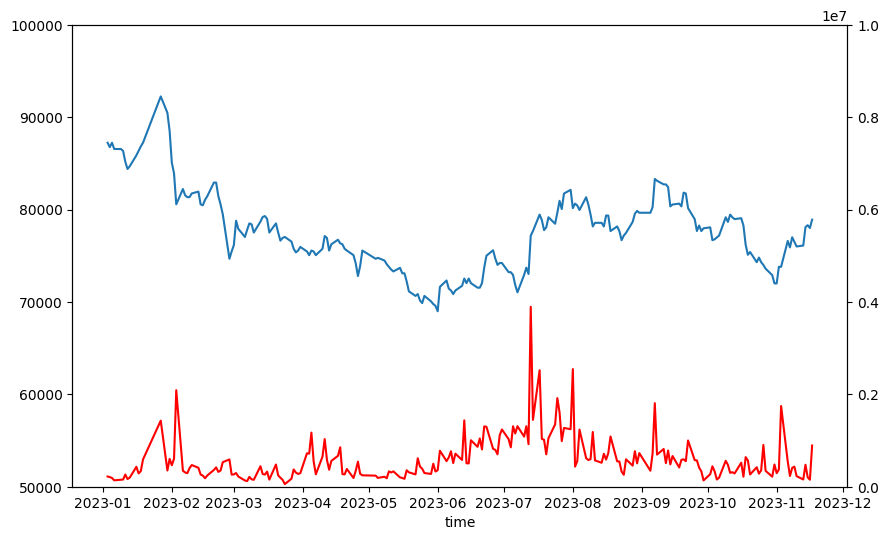

In [21]:
startdate = '2023-01-01'
enddate = dt.datetime.today().date().strftime('%Y-%m-%d')
group = 'Ngân hàng'
tickers = (companies_list
           .ticker[companies_list.group == group]
           .tolist())


def stockprice(tickers, startdate, enddate):
    df = pd.DataFrame()
    for s in tickers:
        stockprice = (
            vns.stock_historical_data (symbol=s,
                               start_date=startdate,
                               end_date=enddate,
                               resolution='1D',
                               type='stock')
                               .drop_duplicates('time')
                               .set_index('time')
                               [['close','volume','ticker']]
                               .pivot(columns='ticker')
        )
        df = pd.concat([df,stockprice], axis=1)
    return df

df = stockprice(tickers, startdate, enddate)

# **Stock Filter**

In [46]:
# phân tích ngành
vns.industry_analysis("SHP", lang='vi')

/usr/local/lib/python3.10/dist-packages/vnstock/trading.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_names, inplace=True)


Mã CP,SHP,POW,PGV,DNH,VSH,DTK,NT2,HND,SBH,QTP,GEG,PPC,TMP,HNA,AVC,CHP,VPD,VCP,TTA,SJD
Vốn hóa (tỷ),2915,27283,24492,19008,10513,7374,7053,7010,6870,6320,4522,4312,4256,4234,3970,3555,2452,1873,1389,1025
Giá,28800,11650,21800,45000,44500,10800,24500,14020,55300,14044,13250,13450,60800,18000,52900,24200,23000,22352,8170,14850
Số phiên tăng/giảm liên tiếp,-1,-1,-1,0,1,0,-2,-2,0,-2,0,0,-2,-1,1,-1,-1,-1,-2,0
P/E,12.3,19.1,13.1,17.0,9.2,14.1,17.0,13.3,12.2,14.7,42.9,12.2,8.7,13.0,9.7,10.8,11.9,8.9,10.6,7.9
PEG,-0.3,0.8,-0.7,-0.4,1.4,-0.3,-0.3,-0.4,-0.6,-0.3,-0.6,-3.4,-0.8,-0.5,-0.3,-0.3,-0.7,-0.5,-0.3,-0.2
P/B,2.3,0.9,1.5,3.2,2.1,0.9,1.7,1.1,3.1,1.2,1.0,0.8,2.3,1.3,2.5,1.9,1.5,1.3,0.7,1.0
EV/EBITDA,6.3,7.1,6.6,12.6,6.0,4.8,7.2,5.0,9.0,4.8,9.9,55.3,6.9,6.6,8.0,10.0,10.0,6.2,6.2,4.1
Cổ tức,0.15,0.0,0.0,0.088,0.102,0.0,0.095,0.0,0.0,0.0,0.0,0.067,0.066,0.0,0.0,0.143,0.0,0.0,0.0,0.111
ROE,0.177,0.047,0.111,0.184,0.236,0.065,0.097,0.083,0.266,0.074,0.026,0.07,0.291,0.101,0.236,0.171,0.127,0.162,0.067,0.125
ROA,0.135,0.024,0.029,0.139,0.119,0.031,0.055,0.061,0.255,0.053,0.006,0.06,0.213,0.087,0.219,0.108,0.102,0.061,0.029,0.087


In [47]:
vns.stock_ls_analysis("TCB, BID, CEO, GMD")

Mã CP,BID,CEO,GMD,TCB
Vốn hóa (tỷ),217011,11735,21413,109562
Giá,42900,22800,70000,31150
Số phiên tăng/giảm liên tiếp,-2,-1,-1,-1
P/E,11.0,39.8,9.3,6.4
PEG,0.5,-7.6,0.1,-0.3
P/B,1.8,2.0,2.5,0.9
Cổ tức,0.0,0.0,0.045,0.0
ROE,0.187,0.066,0.295,0.146
ROA,0.009,0.034,0.184,0.024
Nợ/Vốn CSH,16.9,0.1,0.2,5.1


In [49]:
vns.general_rating("SHP").T

,0
stockRating,3.1
valuation,2.5
financialHealth,4.2
businessModel,4.3
businessOperation,3.6
rsRating,3.1
taScore,1.0
ticker,SHP
highestPrice,29000.0
lowestPrice,21749.5


In [50]:
vns.biz_model_rating("SHP").T

,0
ticker,SHP
businessModel,4.3
businessEfficiency,5
assetQuality,5
cashFlowQuality,5
bom,4
businessAdministration,4
productService,5
businessAdvantage,3
companyPosition,4


In [51]:
vns.biz_operation_rating("SHP").T

,0
industryEn,Conventional Electricity
loanGrowth,None
depositGrowth,None
netInterestIncomeGrowth,None
netInterestMargin,None
costToIncome,None
netIncomeTOI,None
ticker,SHP
businessOperation,3.6
avgROE,5


In [52]:
vns.financial_health_rating("SHP").T

,0
industryEn,Conventional Electricity
loanDeposit,None
badLoanGrossLoan,None
badLoanAsset,None
provisionBadLoan,None
ticker,SHP
financialHealth,4.2
netDebtEquity,4
currentRatio,3
quickRatio,4


In [53]:
vns.valuation_rating("SHP").T

,0
industryEn,Conventional Electricity
ticker,SHP
valuation,2.5
pe,2
pb,2
ps,1
evebitda,3
dividendRate,5


In [54]:
vns.industry_financial_health("SHP").T

,0
industryEn,None
loanDeposit,None
badLoanGrossLoan,None
badLoanAsset,None
provisionBadLoan,None
ticker,SHP
financialHealth,3.7
netDebtEquity,4
currentRatio,4
quickRatio,4


In [55]:
params = {
            "exchangeName": "HOSE,HNX,UPCOM",
            "marketCap": (100, 1000),
            "dividendYield": (5, 10)
        }

# Áp dụng bộ lọc với hàm để lấy kết quả
df = vns.stock_screening_insights (params, size=1700, drop_lang='vi')
df

,ticker,companyName,marketCap,roe,stockRating,businessOperation,businessModel,financialHealth,alpha,beta,activeBuyPercentage,strongBuyPercentage,suddenlyHighVolumeMatching,forecastVolumeRatio,pe,pb,evEbitda,dividendYield,revenueGrowth1Year,revenueGrowth5Year,epsGrowth1Year,epsGrowth5Year,grossMargin,netMargin,doe,avgTradingValue5Day,avgTradingValue10Day,avgTradingValue20Day,relativeStrength3Day,relativeStrength1Month,relativeStrength3Month,relativeStrength1Year,totalTradingValue,priceNearRealtime,rsi14,foreignVolumePercent,tcRS,foreignBuySell20Session,numIncreaseContinuousDay,numDecreaseContinuousDay,eps,volumeVsVSma5,volumeVsVSma10,volumeVsVSma20,volumeVsVSma50,priceGrowth1Week,priceGrowth1Month,prev1DayGrowthPercent,prev1MonthGrowthPercent,prev1YearGrowthPercent,prev5YearGrowthPercent,freeTransferRate,netCashPerMarketCap,netCashPerTotalAssets,profitForTheLast4Quarters,lastQuarterRevenueGrowth,secondQuarterRevenueGrowth,lastQuarterProfitGrowth,secondQuarterProfitGrowth,percent1YearFromPeak,percentAwayFromHistoricalPeak,percent1YearFromBottom,percentOffHistoricalBottom,exchangeName.en,industryName.en,priceVsSMA5.en,priceVsSMA20.en,tcbsBuySellSignal.en,macdHistogram.en,priceVsSma10.en,priceVsSma50.en,bollingBandSignal.en,rsi14Status.en,hasFinancialReport.en,priceVsSMA100.en,foreignTransaction.en,uptrend.en,tcbsRecommend.en,heatingUp.en,sarVsMacdHist.en,breakout.en
0,AAM,,107,2.1,NaN,2.0,NaN,3.4,0.0,0.6,37.7,80.6,22.9,0.6,24.1,0.5,-27.3,6.5,58.08,-1.11,7394.02,71.73,NaN,NaN,0.0,0.09,0.07,0.10,28.0,51.0,75.0,45.0,0.05,9.55,44.9,0.87,50.0,5,1.0,NaN,423.0,0.7,0.8,0.9,0.7,-3.54,-3.54,-6.37,-3.54,-3.28,4.11,35.0,36.6,17.9,4.4,-39.2,-40.1,-138.2,-90.2,-21.3,-43.3,7.3,77.1,HOSE,Food & Beverage,Price cross below SMA(5),Price cross below SMA(20),Sell,MACD Histogram > 0 and decrease,Price cross below SMA(10),Price below SMA(50),Sell signal,Neutral,Yes,Price below SMA(100),NaN,NaN,NaN,NaN,NaN,NaN
1,ABT,,412,13.6,3.3,3.0,3.0,4.8,0.5,0.5,NaN,NaN,NaN,NaN,6.4,0.9,6.9,7.9,80.49,9.95,90.24,17.33,14.89,10.38,0.1,0.00,0.00,0.01,91.0,90.0,87.0,62.0,NaN,NaN,NaN,1.81,82.0,2,0.0,0.0,5440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,-1.5,-1.1,64.1,-16.5,-24.5,13.9,-10.8,NaN,NaN,NaN,NaN,HOSE,Food & Beverage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACL,,622,1.9,2.2,2.7,3.0,2.4,0.8,0.0,73.8,57.5,12.4,0.5,41.3,0.8,14.6,7.0,-3.85,-0.35,180.24,40.45,13.39,1.42,1.0,0.41,0.37,0.49,58.0,20.0,46.0,61.0,0.18,12.40,43.8,2.63,46.0,5,NaN,1.0,300.0,0.6,0.5,0.5,0.1,0.00,-0.40,0.00,-0.40,25.82,-16.07,40.0,-123.0,-43.2,15.1,4.6,-11.3,-73.5,-87.7,-22.3,-60.3,46.1,573.6,HOSE,Food & Beverage,NaN,Price above SMA(20),Sell,MACD Histogram > 0 and decrease,NaN,Price below SMA(50),NaN,Neutral,Yes,Price below SMA(100),Buy > Sell,NaN,NaN,NaN,NaN,NaN
3,BMC,,190,9.6,2.9,2.5,3.5,4.2,0.2,1.2,72.7,45.7,4.4,0.5,9.2,0.9,4.8,7.8,33.20,-3.38,22.35,17.13,30.14,13.28,0.0,1.25,0.82,0.64,39.0,31.0,37.0,41.0,0.58,15.00,56.8,6.15,37.0,4,NaN,1.0,1672.0,0.5,0.7,1.0,0.7,7.53,4.53,-1.96,4.53,47.50,30.88,55.0,28.5,21.4,20.7,131.4,-42.3,86.0,-34.2,-11.5,-79.0,59.2,664.8,HOSE,Basic Resources,Price cross below SMA(5),Price above SMA(20),Buy,MACD Histogram > 0 and decrease,NaN,Price above SMA(50),NaN,Neutral,Yes,Price above SMA(100),Buy > Sell,NaN,NaN,NaN,NaN,NaN
4,BTP,,807,3.5,2.4,1.4,3.5,4.8,-0.1,0.4,40.0,48.3,7.3,0.1,18.8,0.7,21.2,9.3,-57.66,-26.80,-44.39,-5.15,NaN,26.63,0.2,0.09,0.09,0.07,84.0,34.0,44.0,25.0,0.01,13.10,36.4,9.38,47.0,-2,1.0,NaN,709.0,0.2,0.2,0.2,0.1,0.00,-3.32,-1.87,-3.32,-1.40,40.34,20.0,-9.5,-4.9,42.9,-73.3,218.0,-86.3,54.9,-16.8,-28.4,15.0,965.4,HOSE,Utilities,Price cross below SMA(5),Price cross below SMA(20),Sell,MACD Histogram > 0 and decrease,Price cross below SMA(10),Price below SMA(50),Sell signal,Neutral,Yes,Price below SMA(100),NaN,Buy Signal,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# **Trading Data**

In [61]:
vns.stock_intraday_data(symbol='GMD', page_size=10, investor_segment=False)

,ticker,time,orderType,volume,price,prevPriceChange
0,GMD,14:45:03,,27800,69600.0,200.0
1,GMD,14:29:55,SD,700,69400.0,0.0
2,GMD,14:29:55,SD,300,69400.0,100.0
3,GMD,14:29:33,SD,1700,69300.0,-100.0
4,GMD,14:29:33,BU,300,69400.0,0.0
5,GMD,14:29:33,BU,100,69400.0,100.0
6,GMD,14:29:33,SD,5000,69300.0,-100.0
7,GMD,14:29:31,BU,200,69400.0,0.0
8,GMD,14:29:26,BU,100,69400.0,0.0
9,GMD,14:29:15,BU,1000,69400.0,0.0


In [60]:
vns.stock_intraday_data(symbol='GMD', page_size=10, investor_segment=True)

,ticker,time,orderType,investorType,volume,averagePrice,orderCount,prevPriceChange
0,GMD,14:29:56,Sell Down,SHEEP,1000,69400.0,2,100.0
1,GMD,14:29:33,Sell Down,SHEEP,1700,69300.0,1,-100.0
2,GMD,14:29:33,Buy Up,SHEEP,400,69400.0,2,100.0
3,GMD,14:29:33,Sell Down,WOLF,5000,69300.0,1,-100.0
4,GMD,14:29:31,Buy Up,SHEEP,200,69400.0,1,0.0
5,GMD,14:29:26,Buy Up,SHEEP,100,69400.0,1,0.0
6,GMD,14:29:15,Buy Up,SHEEP,1000,69400.0,1,0.0
7,GMD,14:29:04,Buy Up,SHEEP,300,69400.0,1,0.0
8,GMD,14:29:02,Buy Up,SHEEP,200,69400.0,1,0.0
9,GMD,14:28:52,Buy Up,SHEEP,600,69400.0,1,0.0


# **Derivatives**

In [66]:
cookie = 'RV9cd20160034'
vns.derivatives_historical_match (symbol='VN30F2308', date='2023-07-24', cookie=cookie)

KeyError: ignored